In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\montcoalert\911.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
s=df['zip'].value_counts()
s.head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
k=df['twp'].value_counts()
k.head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [9]:
df['title'].nunique()

141

In [10]:
import re
def reason(s):
    if(re.search(r"^EMS",s)):
        return "EMS"
    elif(re.search(r"^Fire",s)):
        return "Fire"
    elif(re.search(r"Traffic",s)):
        return "Traffic"

In [11]:
df["Reason"]=df['title'].apply(reason)
df["Reason"].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [12]:
df["Reason"].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

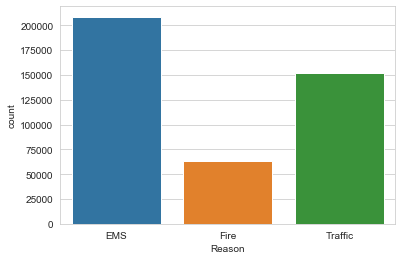

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="Reason",data=df)

In [14]:
type(df["timeStamp"].iloc[0])

str

In [15]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])
df["timeStamp"].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [16]:
time = df['timeStamp'].iloc[2]
time.hour

14

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['Day of Week']=df['Day of Week'].map(dmap)

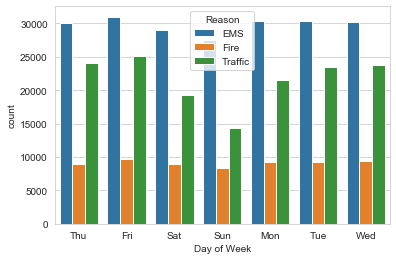

In [20]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

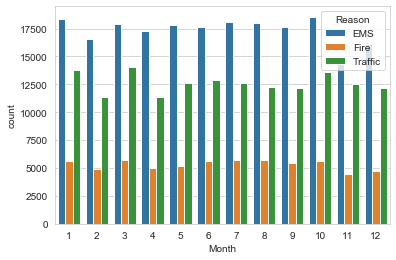

In [21]:
sns.countplot(x="Month",data=df,hue="Reason")

In [22]:
df["count"]=df["Month"].groupby(df["Month"]).count()
df["count"].dropna()

1     37824.0
2     32828.0
3     37666.0
4     33583.0
5     35644.0
6     36171.0
7     36405.0
8     35972.0
9     35339.0
10    37815.0
11    31643.0
12    33019.0
Name: count, dtype: float64

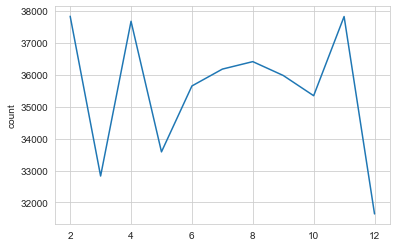

In [23]:
series=pd.Series(range(1,13))
sns.lineplot(x=series,y="count",data=df)

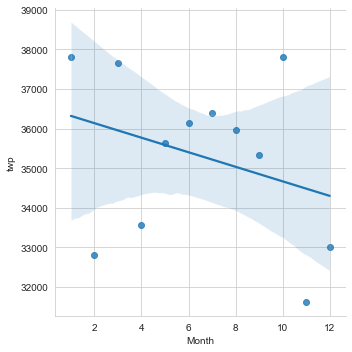

In [24]:
byMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())